In [1]:
import os
import numpy as np
import cv2
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
def load_images_from_folder(folder_path,target_size=(92,112)):
  images=[]
  labels=[]
  for subdir in os.listdir(folder_path):
    subfolder_path=os.path.join(folder_path,subdir)
    if not os.path.isdir(subfolder_path):
      continue

    label=int(subdir[1:])
    for filename in os.listdir(subfolder_path):
      image_path=os.path.join(subfolder_path,filename)
      image=cv2.imread(image_path,cv2.IMREAD_GRAYSCALE)
      if image is not None:
        image=cv2.resize(image,target_size)
        images.append(image)
        labels.append(label)
  return np.array(images),np.array(labels)

dataset_folder="drive/MyDrive/FaceRecognition/ORL"
images,labels=load_images_from_folder(dataset_folder)
print("Number of images loaded",len(images))
print("Number of labels loaded",len(labels))

Number of images loaded 400
Number of labels loaded 400


In [4]:
from sklearn.model_selection import  train_test_split
X_train,X_test,y_train,y_test=train_test_split(images,labels,test_size=0.2,random_state=42)

In [5]:
X_train.shape

(320, 112, 92)

In [6]:
X_test.shape

(80, 112, 92)

In [7]:
nsamples, nx, ny=X_train.shape
d2_train_dataset=X_train.reshape((nsamples,nx*ny))
d2_train_dataset

array([[ 47,  43,  48, ...,  45,  49,  50],
       [ 48,  46,  49, ...,  31,  31,  36],
       [ 93,  92,  98, ..., 118, 119, 130],
       ...,
       [123, 122, 121, ...,  84,  92,  94],
       [ 67,  64,  67, ...,  73,  69,  72],
       [ 54,  55,  60, ..., 156, 181, 217]], dtype=uint8)

In [8]:
nsamples, nx, ny=X_test.shape
d2_test_dataset=X_test.reshape((nsamples,nx*ny))
d2_test_dataset

array([[ 54,  49,  56, ..., 154, 154, 162],
       [ 93,  98,  95, ..., 131, 131, 132],
       [105, 110, 106, ...,  18,  27,  22],
       ...,
       [ 91,  83,  70, ..., 171, 188, 190],
       [ 88,  85,  89, ..., 117, 117, 116],
       [107, 103, 104, ..., 155, 133, 159]], dtype=uint8)

In [9]:
lda = LDA(n_components=39) #total classes minus 1
X_train_lda = lda.fit_transform(d2_train_dataset,y_train) #fit on training dataset
X_test_lda = lda.transform(d2_test_dataset) #transform the test dataset

In [10]:
svm_classifier=SVC()
svm_classifier.fit(X_train_lda,y_train)

SVC()

In [11]:
y_pred=svm_classifier.predict(X_test_lda)
y_pred

array([33, 21, 13, 30,  4, 19, 27,  4, 20, 15, 17, 35,  8,  6, 37,  1, 25,
        8, 38, 40,  6, 11,  9, 25, 17,  9, 32, 29, 20, 22,  9, 26, 20, 10,
       38, 32, 32,  7, 18, 34, 40, 10,  6, 12, 19, 40, 34, 28, 12, 39,  1,
       27, 24,  6,  8, 13, 29, 39, 13, 18, 15,  3, 31,  6, 22, 13, 36, 20,
        9,  6, 27, 34, 17,  1, 40, 23, 29, 35, 39, 21])

In [12]:
accuracy=accuracy_score(y_test,y_pred)
print('Accuracy',accuracy)

Accuracy 0.9875


In [13]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         6
           7       1.00      1.00      1.00         1
           8       0.67      1.00      0.80         2
           9       1.00      1.00      1.00         4
          10       1.00      0.67      0.80         3
          11       1.00      1.00      1.00         1
          12       1.00      1.00      1.00         2
          13       1.00      1.00      1.00         4
          15       1.00      1.00      1.00         2
          17       1.00      1.00      1.00         3
          18       1.00      1.00      1.00         2
          19       1.00      1.00      1.00         2
          20       1.00      1.00      1.00         4
          21       1.00      1.00      1.00         2
          22       1.00    

In [14]:
print(confusion_matrix(y_test,y_pred))

[[3 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 2 ... 0 0 0]
 ...
 [0 0 0 ... 2 0 0]
 [0 0 0 ... 0 3 0]
 [0 0 0 ... 0 0 4]]


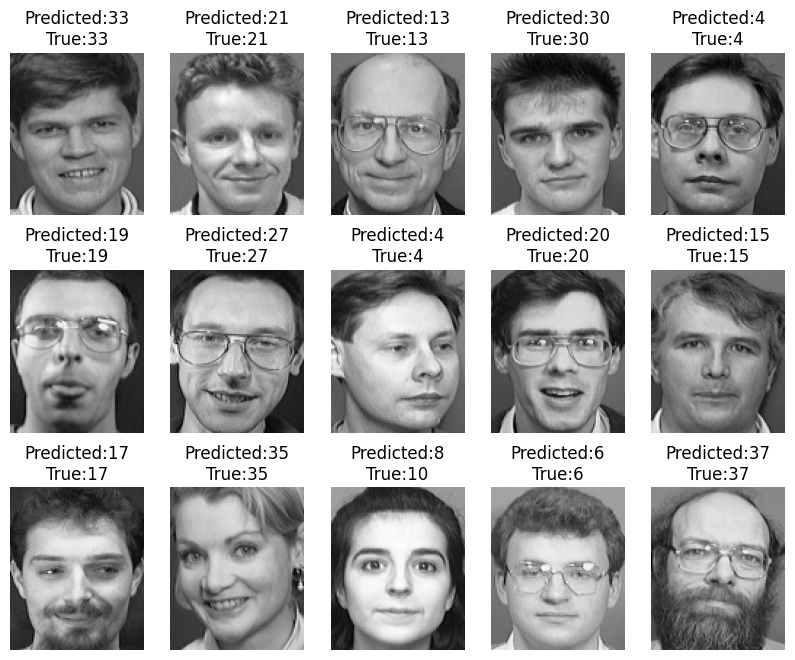

In [15]:
plt.figure(figsize=(10,8))
for i in range(15):
  plt.subplot(3,5,i+1)
  plt.imshow(X_test[i],cmap='gray')
  plt.title(f"Predicted:{y_pred[i]}\nTrue:{y_test[i]}")
  plt.axis('off')
plt.show()

In [17]:
from skimage.io import imread
from skimage.transform import resize
pgm_image_path='drive/MyDrive/FaceRecognition/ORL/s20/4.pgm'
pgm_image=imread(pgm_image_path)
nsamples, nx, ny=(1,112,92)
flattened_image=pgm_image.reshape((nsamples,nx*ny))
image_lda=lda.transform(flattened_image)
predicted_label=svm_classifier.predict(image_lda)
predicted_label

array([20])

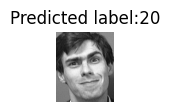

In [18]:
plt.figure(figsize=(100,150))
for i,(image,label) in enumerate(zip(pgm_image,predicted_label)):
  plt.subplot(1,len(pgm_image),1)
  plt.imshow(pgm_image,cmap='gray')
  plt.title(f"Predicted label:{label}")
  plt.axis('off')
plt.show()

## RANDOM FOREST CLASSIFIER

In [19]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest classifier on LDA features
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_lda, y_train)

# Make predictions
y_pred_rf = rf_classifier.predict(X_test_lda)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.4f}")

print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

print("\nRandom Forest Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))


Random Forest Accuracy: 0.9250

Random Forest Classification Report:
              precision    recall  f1-score   support

           1       1.00      0.33      0.50         3
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         2
           5       0.00      0.00      0.00         0
           6       1.00      1.00      1.00         6
           7       1.00      1.00      1.00         1
           8       0.67      1.00      0.80         2
           9       1.00      1.00      1.00         4
          10       1.00      0.67      0.80         3
          11       1.00      1.00      1.00         1
          12       1.00      1.00      1.00         2
          13       1.00      1.00      1.00         4
          15       1.00      1.00      1.00         2
          16       0.00      0.00      0.00         0
          17       1.00      1.00      1.00         3
          18       1.00      1.00      1.00         2
          19

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


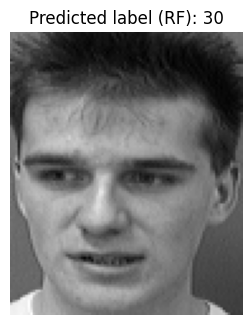

In [21]:
pgm_image_path = 'drive/MyDrive/FaceRecognition/ORL/s30/4.pgm'
# load and resize image
pgm_image = imread(pgm_image_path)
pgm_image_resized = resize(pgm_image, (112, 92), preserve_range=True).astype('uint8')

# convert to 1D vector
nsamples, nx, ny = (1, 112, 92)
flattened_image = pgm_image_resized.reshape((nsamples, nx*ny))

# LDA transformation
image_lda = lda.transform(flattened_image)

# Predict using Random Forest classifier
predicted_label_rf = rf_classifier.predict(image_lda)

# Plot the image with predicted label
plt.figure(figsize=(3, 4))
plt.imshow(pgm_image_resized, cmap='gray')
plt.title(f"Predicted label (RF): {predicted_label_rf[0]}")
plt.axis('off')
plt.show()